# Hypothesis Testing and Error types


http://www.stat.columbia.edu/~gelman/research/published/multiple2f.pdf

## Background

Researchers from nearly every social and physical science discipline have found themselves in the position of simultaneously evaluating many questions, testing many hypothesis, or comparing many point estimates. In program evaluation this arises, for instance, when comparing the impact of several different policy interventions; comparing the status of social indicators (test scores, poverty rates, teen pregnancy rates) across multiple schools, states, or countries; examining whether treatment effects vary meaningfully across different subgroups of the population; or examining the impact of a program on many different outcomes. The main multiple comparisons problem is that the probability a researcher wrongly concludes that there is at least one statistically significant effect across a set of tests

## Error 

We challenge the Type I error paradigm that underlies these corrections. Moreover we posit that the problem of multiple comparisons can disappear entirely when viewed from a hierarchical Bayesian perspective. We propose building multilevel models in the settings where multiple comparisons arise. Multilevel models perform partial pooling (shifting estimates toward each other), whereas classical procedures typically keep the centers of intervals stationary, adjusting for multiple comparisons by making the intervals wider (or, equivalently, adjusting the p values corresponding to intervals of fixed width). Thus, multilevel models address the multiple comparisons problem and also yield more efficient estimates, especially in settings with low group-level variation, which is where multiple comparisons are a particular concern.

then the probability that at least one of these tests yields an erroneous rejection raises to 1-Pr(neither test yields an erroneous rejection of the null) = 1 – 0.95 × 0.95 = 0.098 ≈ 0.10. Following the same logic, if we performed (independent) tests for all eight sites at a .05 significance level there would be a 34% chance that at least one of these would reject in error

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
n = 100 # sample size
effect_size = 10 # lift
A_n = 10000
B_n = 2000

# data
np.random.seed(seed=123)
A_data = stats.binom(1, .1).rvs(A_n)
B_data = stats.binom(1, .12).rvs(B_n)

# conversion rates
A_mu = np.mean(A_data)
B_mu = np.mean(B_data)

# standard error p*(1-p)/sqrt(n)
A_stderr = np.sqrt(A_mu*(1-A_mu)/A_n)
B_stderr = np.sqrt(B_mu*(1-B_mu)/B_n)

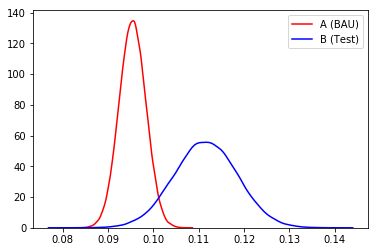

In [69]:

# Plotting data
data_null = stats.norm(A_mu, A_stderr).rvs(100000) # current web page assuming 100,000 visitors in the past month
data_alt = stats.norm(B_mu, B_stderr).rvs(100000) # The true distribution of the new experience

sns.kdeplot(data_null, color="red", shade=False, label='A (BAU)')
sns.kdeplot(data_alt, color="blue", shade=False, label='B (Test)')


## Analyzing Type I Error

There is not really a concept of measuring type I error. More test data does not necessarily reduce your type I error. More test data allows you to read smaller effect sizes.

The researcher picks an acceptable type I error is acceptable and analyzes if the test data meets the threshold. In our example above we set a significance $p=.95$ or a confidence of 95% must be achieved to make a deceision. We can then place the one-sided 95% confidence lines. 

### Webtest results

In the lines do not cross each other then we have reject `H_{0}` that there is not a signficant difference. This is the visual equivalent of a two sample z-test.

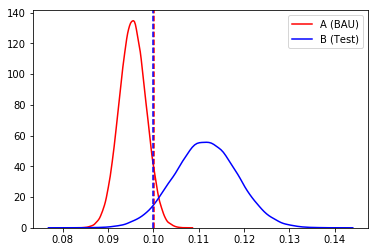

In [70]:
# Confidence bounds
A_ub = A_mu + A_stderr*1.645
B_lb = B_mu - B_stderr*1.645

sns.kdeplot(data_null, color="red", shade=False, label='A (BAU)')
sns.kdeplot(data_alt, color="blue", shade=False, label='B (Test)')
plt.axvline(A_ub,  color='red', linestyle='--')
plt.axvline(B_lb,  color='blue', linestyle='--')

In [80]:
from statsmodels.stats.proportion import proportions_ztest

In [83]:
proportions_ztest([sum(A_data), sum(B_data)], [len(A_data), len(B_data)], alternative='smaller')

(-2.2098837898631807, 0.013556614265153984)

In [ ]:
(A_mu - B_mu)/(np.sqrt())

### Type II Error

If we do not reject the null hypothesis when in fact there is a difference between the groups we make what is known as a type II error . The type II error rate is often denoted as $\beta$ the power of a study is defined as $1-\beta$ and is the probability of rejecting the null hypothesis when it is false. The most common reason for type II errors is that the study is too small.

The concept of power is really only relevant when a test is being planned. During planning we are considering what types of alternate hypothesis we will actually be able to read - and therefor need to consider probably of data under hypothetical alternate hypothesis.

In [ ]:
#plt.fill_between(alpha_xs, alpha_ymin, alpha_ymax, alpha=.3, color='red')
#plt.fill_between(beta_xs, beta_ymin, beta_ymax, alpha=.3, color='blue')
#plt.axvline(.3,  color='red', linestyle='--')
#plt.axvline(.3 + 1.96*.3/np.sqrt(n),  color='black', linestyle='--')
#plt.ylim(0, 20)
#plt.xlim(.15,.55)

In [10]:
xs

array([0.08    , 0.080007, 0.080014, ..., 0.149986, 0.149993, 0.15    ])

# How to Accept an Alternate Hypothesis

### You can still accept an alternate hypothesis $H_{a}$ even though you haven't proved it to be true

Lets say you run the test and get data back that has only.a 4% (p=.04) of occurring given the null hypothesis was true. So you reject the null hypothesis. What do you do know that you have reason the disbelieve the null hypothesis. You must (1) probably research more (2) consider what hypothesis you move forward with. 

In academia it is frowned upon to "accept" the alternate hypothesis. In practice you accept an alternate hypothesis under consideration that the true value can be anywhere within the standard error range.


## Type M and S Error 

There are two types of error introduced from accepting an alternative hypothesis. If the size of the effect factors into our decision making then we would certainly be concerned with effects of magnitude. Particularly in with noisy data and high standard error which automatically leads to a systematic overestimation of effect size: 

**Type M:** the probability of incorrect estimation of magnitude.


**Type S:** the probability of getting opposite sign of the true effect. 
